## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import os
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = os.path.join('data','Mouse_metadata.csv')
study_results_path = os.path.join('data','Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_df.groupby("Mouse ID").count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df_groupby_counts = mouse_df.groupby(["Mouse ID", "Timepoint"]).count()['Drug Regimen']
duplicates = mouse_df_groupby_counts[mouse_df_groupby_counts > 1]
duplicates

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Drug Regimen, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_g989 = mouse_df[mouse_df["Mouse ID"] == 'g989']
data_g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_indexed = mouse_df.set_index("Mouse ID")
mouse_df_indexed_clean = mouse_df_indexed.drop('g989')
mouse_df = mouse_df_indexed_clean.reset_index()




KeyError: "['g989'] not found in axis"

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mouse_df.groupby("Mouse ID"))
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_mean = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_vol_per_drug_summary = pd.DataFrame({'Mean Tumor Volume (mm3)': tumor_vol_mean,
                                           'Median Tumor Volume (mm3)': tumor_vol_median,
                                           'Variance of Tumor Volume (mm3)': tumor_vol_var,
                                           'Standard Deviation of Tumor Volume (mm3)': tumor_vol_std,
                                           'SEM of Tumor Volume (mm3)': tumor_vol_sem})

tumor_vol_per_drug_summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

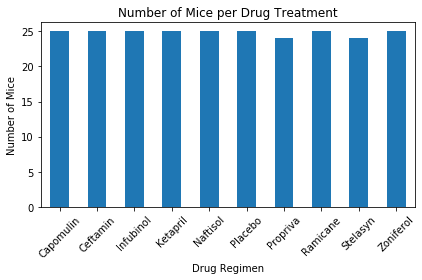

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment = mouse_df[["Mouse ID", "Drug Regimen"]].drop_duplicates().groupby("Drug Regimen")
mice_per_treatment_counts = mice_per_treatment.count()["Mouse ID"]
mice_per_treatment_chart = mice_per_treatment_counts.plot(x="Drug Regimen",kind="bar")
mice_per_treatment_chart.set_xlabel("Drug Regimen")
mice_per_treatment_chart.set_ylabel("Number of Mice")
mice_per_treatment_chart.set_title("Number of Mice per Drug Treatment")

plt.xticks(rotation=45)
plt.tight_layout()



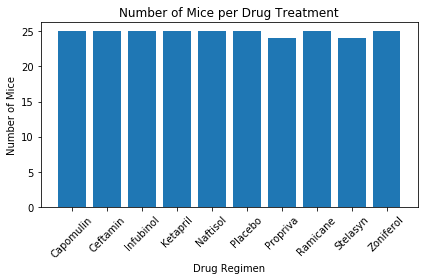

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_names = mice_per_treatment.count().index
mice_per_treatment_chart_2 = plt.bar(drug_names, mice_per_treatment_counts)

plt.title("Number of Mice per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)

plt.tight_layout()



Text(0.5, 1.0, 'Sex of Mice in Trial')

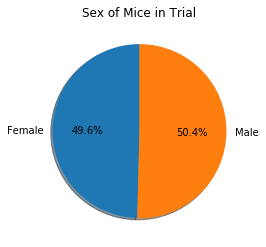

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = mouse_df[["Mouse ID", "Sex"]].drop_duplicates().groupby("Sex")
sex = sex_df.count()["Mouse ID"]
sex_chart = sex.plot(kind="pie", shadow=True, startangle=90, autopct="%1.1f%%")
sex_chart.set_ylabel("")
sex_chart.set_title("Sex of Mice in Trial")



([<matplotlib.patches.Wedge at 0x1cd3f89da48>,
 [Text(-1.0999117423341975, 0.013934097579311333, 'Female'),
  Text(1.0999117423341975, -0.013934097579311466, 'Male')],
 [Text(-0.5999518594550168, 0.0076004168614425445, '49.6%'),
  Text(0.5999518594550168, -0.007600416861442617, '50.4%')])

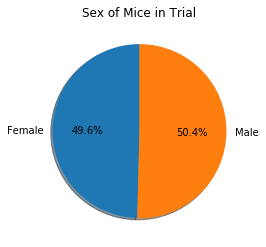

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_names = sex.index
plt.title("Sex of Mice in Trial")
plt.pie(sex, labels=gender_names, autopct="%1.1f%%", shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = pd.DataFrame()
filtered_df = mouse_df[mouse_df["Drug Regimen"].isin(list_of_drugs)]

    
# Start by getting the last (greatest) timepoint for each mouse
max_time_points = filtered_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_time_points, mouse_df, on="Mouse ID")
merged_df["End Tumor Volume (mm3)"] = merged_df[merged_df["Timepoint_x"] == merged_df["Timepoint_y"]]["Tumor Volume (mm3)"]
end_tumor_volume = merged_df.groupby("Mouse ID").max()["End Tumor Volume (mm3)"]
merged_df = pd.merge(end_tumor_volume, merged_df, on="Mouse ID")
merged_df.drop("End Tumor Volume (mm3)_y", axis=1)
merged_df = merged_df.rename(columns = {'End Tumor Volume (mm3)_x': 'End Tumor Volume (mm3)',
                                        'Timepoint_x':'End Timepoint',
                                        'Timepoint_y':'Timepoint'}, inplace = False)
merged_df



,Mouse ID,End Tumor Volume (mm3),End Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,End Tumor Volume (mm3)_y
0,a203,67.973419,45,Infubinol,Female,20,23,0,45.000000,0,NaN
1,a203,67.973419,45,Infubinol,Female,20,23,5,48.508468,0,NaN
2,a203,67.973419,45,Infubinol,Female,20,23,10,51.852437,1,NaN
3,a203,67.973419,45,Infubinol,Female,20,23,15,52.777870,1,NaN
4,a203,67.973419,45,Infubinol,Female,20,23,20,55.173336,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
809,z581,62.754451,45,Infubinol,Female,24,25,25,54.316407,2,NaN
810,z581,62.754451,45,Infubinol,Female,24,25,30,56.286750,2,NaN
811,z581,62.754451,45,Infubinol,Female,24,25,35,58.628399,3,NaN
812,z581,62.754451,45,Infubinol,Female,24,25,40,60.053740,3,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list_of_drugs
end_vol_df = merged_df[["Mouse ID", "End Tumor Volume (mm3)", "Drug Regimen"]].drop_duplicates()
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    tumor_vol_data = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for index, row in end_vol_df.iterrows():
    # add subset 
        if row["Drug Regimen"] == drug:
            tumor_vol_data.append(row["End Tumor Volume (mm3)"])
    # Determine outliers using upper and lower bounds
    tumor_vol_data = pd.Series(tumor_vol_data)
    quantiles = tumor_vol_data.quantile([.25, .5, .75])
    q1 = quantiles[.25]
    q3 = quantiles[.75]
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are as follows (in mm3):")
        print(outliers)
    else:
        print(f"{drug} has no outliers.")
    

    

Capomulin has no outliers.
Ramicane has no outliers.
The outliers for Infubinol are as follows (in mm3):
5    36.321346
dtype: float64
Ceftamin has no outliers.


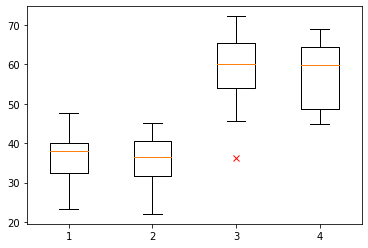

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
end_tumor_vol_Capomulin = []
end_tumor_vol_Ramicane = []
end_tumor_vol_Infubinol = []
end_tumor_vol_Ceftamin = []

for drug in treatments:
    tumor_vol_data = []
    for index, row in end_vol_df.iterrows():
        if row["Drug Regimen"] == drug:
            tumor_vol_data.append(row["End Tumor Volume (mm3)"])
    if drug == "Capomulin":
        end_tumor_vol_Capomulin = pd.Series(tumor_vol_data)
    elif drug == "Ramicane":
        end_tumor_vol_Ramicane = pd.Series(tumor_vol_data)
    elif drug == "Infubinol":
        end_tumor_vol_Infubinol = pd.Series(tumor_vol_data)
    else:
        end_tumor_vol_Ceftamin = pd.Series(tumor_vol_data)
        
box_plot_data = [end_tumor_vol_Capomulin, end_tumor_vol_Ramicane, end_tumor_vol_Infubinol, end_tumor_vol_Ceftamin]

fig, ax = plt.subplots()
ax.boxplot(box_plot_data, sym='rx')

plt.show()


## Line and Scatter Plots

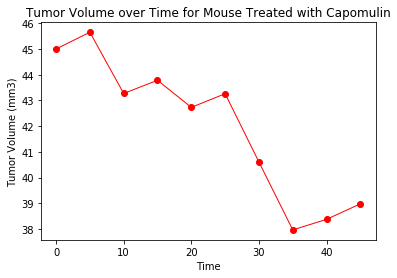

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
merged_df[merged_df["Drug Regimen"] == "Capomulin"].head(50)
data_b128 = mouse_df[mouse_df["Mouse ID"] == 'b128']
data_b128 


plt.title("Tumor Volume over Time for Mouse Treated with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(data_b128["Timepoint"], data_b128["Tumor Volume (mm3)"], marker='o', color="red", linewidth=1)
plt.show()


y = 1.15x + 18.53
The r-squared is: 0.6609320907737879


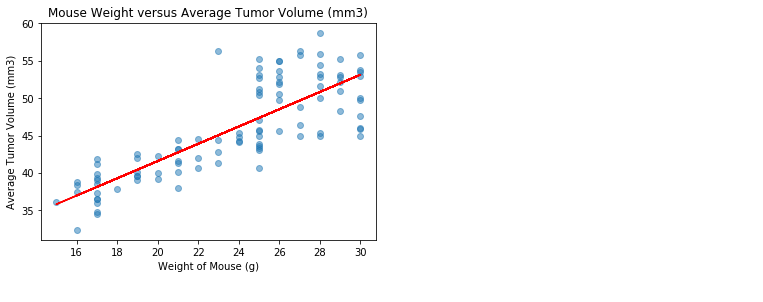

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
merged_df_scatter = merged_df.groupby("Mouse ID").mean()
weight = merged_df_scatter["Weight (g)"]
average_tumor_vol = merged_df_scatter["Tumor Volume (mm3)"]
plt.scatter(weight, average_tumor_vol, alpha=0.5)
plt.title("Mouse Weight versus Average Tumor Volume (mm3)")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")



x_values = weight
y_values = average_tumor_vol

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 24), fontsize=10, color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
